In [24]:
#Girish K - 21BCE1152 - Assignment 5

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn import cluster

In [26]:
#read the data
data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.describe()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [28]:
#genre instead of gender
data['Genre'].value_counts()


Genre
Female    112
Male       88
Name: count, dtype: int64

In [29]:
#removing unique column 
data.drop(columns=['CustomerID'],axis=1,inplace=True)


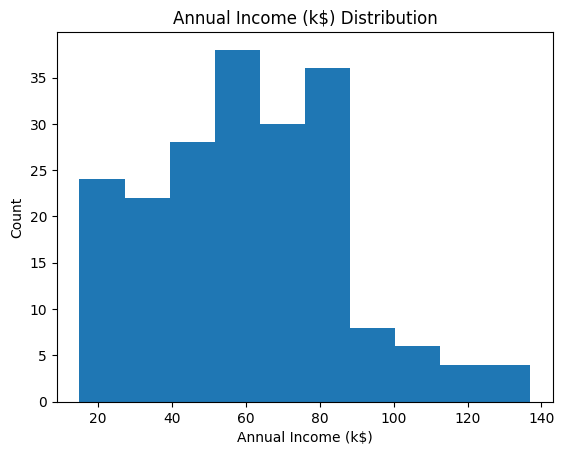

In [30]:
#plotting the data
#univariate visualization
#for Annual Income (k$)
plt.hist(data['Annual Income (k$)'],bins=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Annual Income (k$) Distribution')
plt.show()

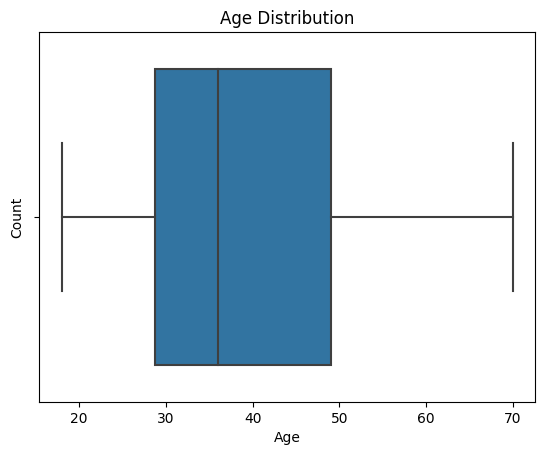

In [31]:
#boxplot of Age variable
sns.boxplot(x = data['Age'])
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


C:\Users\giris\AppData\Local\Temp\ipykernel_22568\3094342287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

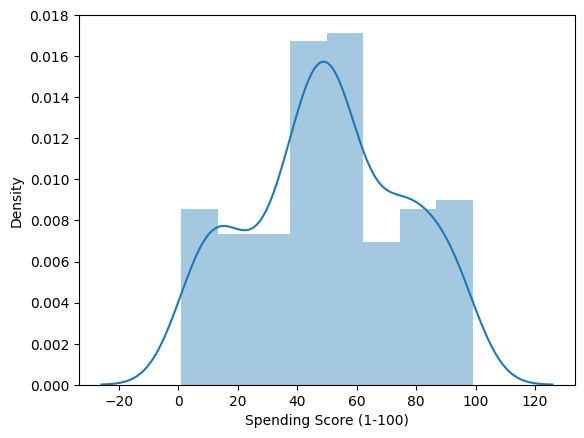

In [32]:
sns.distplot(data['Spending Score (1-100)'])

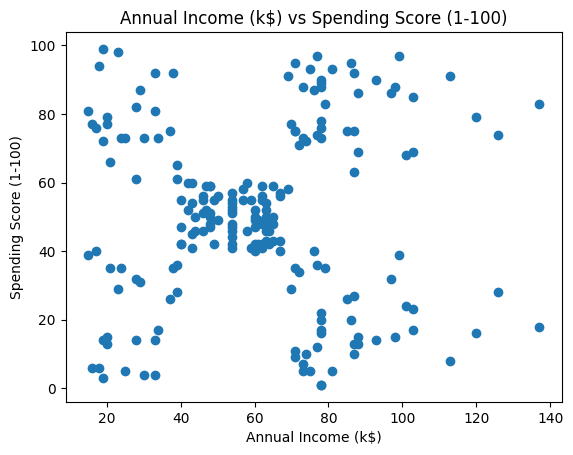

In [33]:
#bivariate visualization
#scatterplot of annual income and spending score
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()

c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


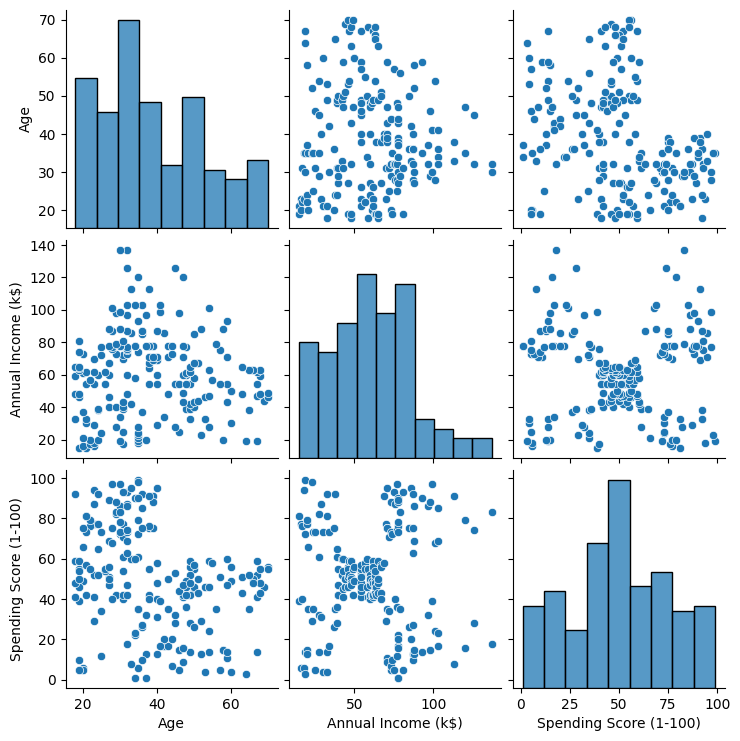

In [34]:
#multivariate visualization
#pairplot of all variables
sns.pairplot(data)

<Axes: >

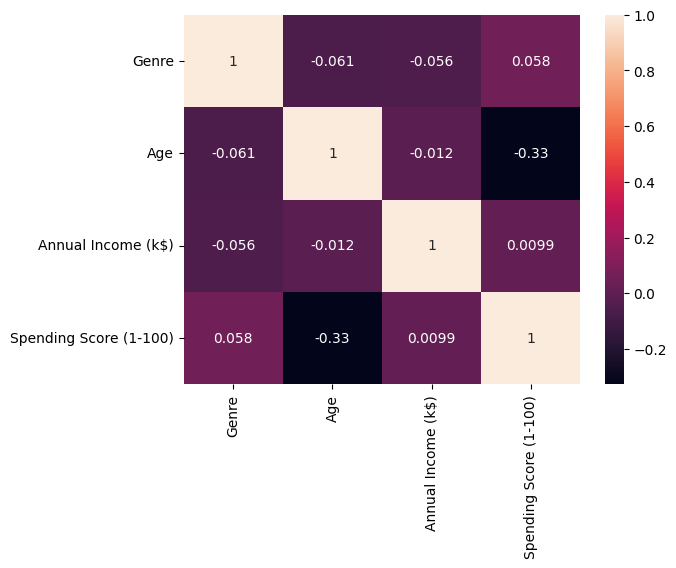

In [35]:
# convert Gender column to numerical representation
data['Genre'] = data['Genre'].replace({'Male': 0, 'Female': 1})

# correlation matrix
sns.heatmap(data.corr(), annot=True)


In [36]:
#perform data preprocessing
#check for missing values
data.isnull().sum()


Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
#no missing values
#check for shape    
print(data.shape)

(200, 4)


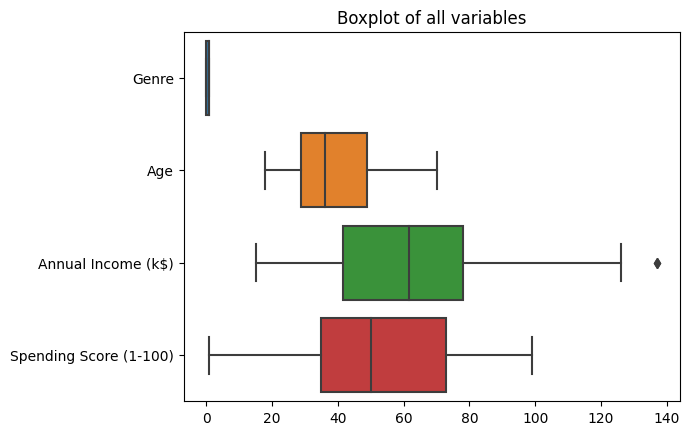

In [40]:
sns.boxplot(data = data, orient = 'h')
#this is the boxplot of all the variables
plt.title('Boxplot of all variables')
plt.show()

In [42]:
#perform clustering
error = []
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [44]:
error

[308862.06000000006,
 212889.44245524294,
 143391.5923603568,
 104414.67534220168,
 75399.61541401484,
 58348.64136331505,
 51165.18423710792,
 44389.807673557676,
 40670.98996236322,
 37201.52704476877]

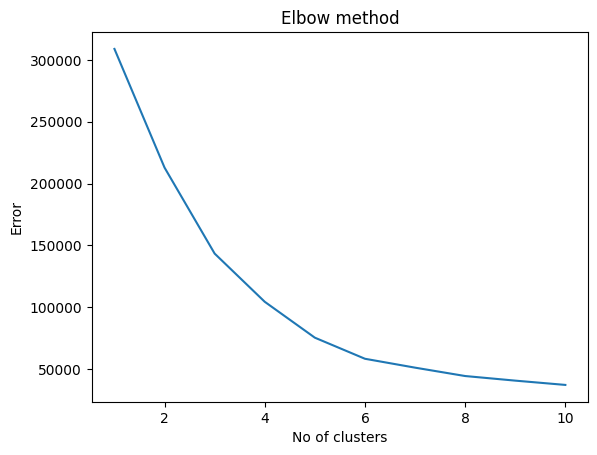

In [46]:
plt.plot(range(1, 11), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [54]:
#taking 5 clusters
kmeans = cluster.KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(data)
pred = kmeans.predict(data)
silhouette_score(data, pred)
silhouette_avg = silhouette_score(data, pred)
#print silhouette score
print("For n_clusters =", 5,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.4440669204743008


c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


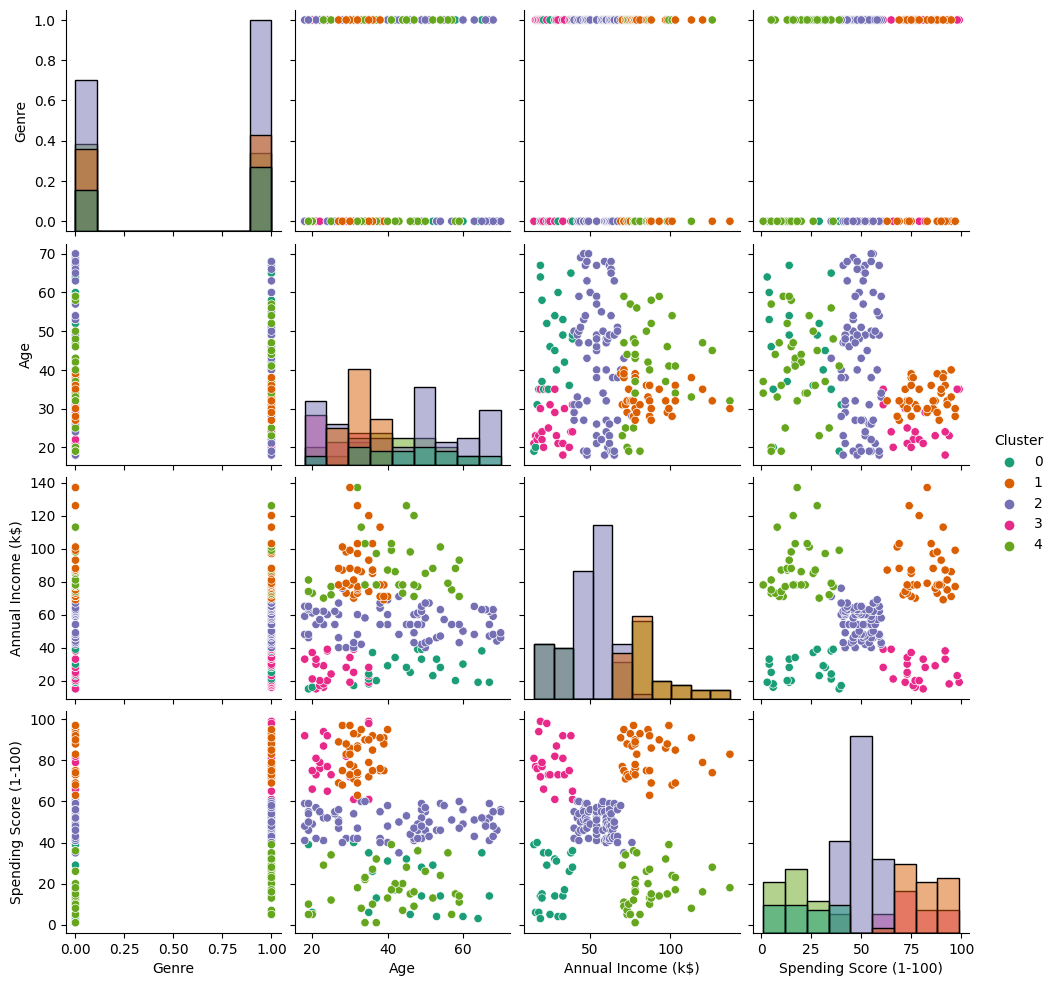

In [69]:
data_visualization = data.copy()
data_visualization['Cluster'] = pred
data_visualization.head()
columns_to_plot = ['Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']
sns.pairplot(data_visualization[columns_to_plot], hue='Cluster',palette='Dark2',diag_kind='hist')




In [83]:
#doing the same with annual income and spending score
#taking 5 clusters
kmeans = cluster.KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
pred = kmeans.predict(data[['Annual Income (k$)','Spending Score (1-100)']])
silhouette_score(data[['Annual Income (k$)','Spending Score (1-100)']], pred)
silhouette_avg = silhouette_score(data[['Annual Income (k$)','Spending Score (1-100)']], pred)
#print silhouette score
print("For n_clusters =", 5,"The average silhouette_score is :", silhouette_avg)


For n_clusters = 5 The average silhouette_score is : 0.553931997444648


c:\Users\giris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


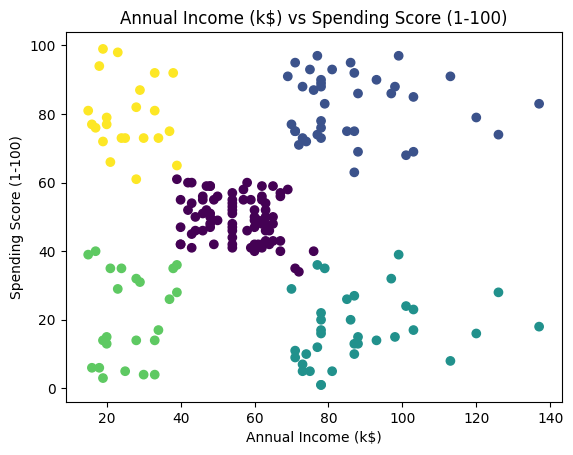

In [85]:
#making a scatterplot of annual income and spending score
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=pred)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()